In [1]:
# Imports
import numpy
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [32]:
# Declarations

# Paths
SUBJECT_A_TRAIN_PATH = '../dataset/Matlab Format/Subject_A_Train.mat'
SUBJECT_A_TEST_PATH = '../dataset/Matlab Format/Subject_A_Test.mat'
SUBJECT_B_TRAIN_PATH = '../dataset/Matlab Format/Subject_B_Train.mat'
SUBJECT_B_TEST_PATH = '../dataset/Matlab Format/Subject_A_Test.mat'

# Input Constants
EPOCHS = 85
CHANNELS = 64
EXTRACTED_CHANNEL = 10 #Cz
EXTRACTED_CHANNELS = numpy.array([33, 10, 48, 50, 52, 55, 59, 61]) # [33, 10, 48, 50, 52, 55, 59, 61], [3,9, 10, 11, 17]
INTENSIFICATIONS = 12
START_WINDOW = 35
END_WINDOW = 135

SUBJECT_A_TEST_RESULTS = 'WQXPLZCOMRKO97YFZDEZ1DPI9NNVGRQDJCUVRMEUOOOJD2UFYPOO6J7LDGYEGOA5VHNEHBTXOO1TDOILUEE5BFAEEXAW_K4R3MRU'
SUBJECT_B_TEST_RESULTS = 'MERMIROOMUHJPXJOHUVLEORZP3GLOO7AUFDKEFTWEOOALZOP9ROCGZET1Y19EWX65QUYU7NAK_4YCJDVDNGQXODBEV2B5EFDIDNR'

# 6x6 Grid That Is Displayed To The User
MATRIX = numpy.array([['A', 'B', 'C', 'D', 'E', 'F'], \
                      ['G', 'H', 'I', 'J', 'K', 'L'], \
                      ['M', 'N', 'O', 'P', 'Q', 'R'], \
                      ['S', 'T', 'U', 'V', 'W', 'X'], \
                      ['Y', 'Z', '1', '2', '3', '4'], \
                      ['5', '6', '7', '8', '9', '_']])

In [33]:
# Loading Data
Subject_A_Train = scipy.io.loadmat(SUBJECT_A_TRAIN_PATH)
Subject_A_Test = scipy.io.loadmat(SUBJECT_A_TEST_PATH)
Subject_B_Train = scipy.io.loadmat(SUBJECT_B_TRAIN_PATH)
Subject_B_Test = scipy.io.loadmat(SUBJECT_B_TEST_PATH)

In [34]:
# Detection

# A
#Train
Subject_A_Signal_Train = numpy.array(Subject_A_Train.get('Signal'));
Subject_A_TargetChar_Train = numpy.array(Subject_A_Train.get('TargetChar'));
Subject_A_Flashing_Train = numpy.array(Subject_A_Train.get('Flashing'));
Subject_A_StimulusCode_Train = numpy.array(Subject_A_Train.get('StimulusCode'));
Subject_A_StimulusType_Train = numpy.array(Subject_A_Train.get('StimulusType'));
print('A Train')
print('Subject A Signal Train:', Subject_A_Signal_Train.shape)
print('Subject A TargetChar Train:', Subject_A_TargetChar_Train.shape)
print('Subject A Flashing Train:', Subject_A_Flashing_Train.shape)
print('Subject A StimulusCode Train:', Subject_A_StimulusCode_Train.shape)
print('Subject A StimulusType Train:', Subject_A_StimulusType_Train.shape)
# Test
Subject_A_Signal_Test = numpy.array(Subject_A_Test.get('Signal'));
Subject_A_Flashing_Test = numpy.array(Subject_A_Test.get('Flashing'));
Subject_A_StimulusCode_Test = numpy.array(Subject_A_Test.get('StimulusCode'));
print('\nA Test')
print('Subject A Signal Test:', Subject_A_Signal_Test.shape)
print('Subject A Flashing Test:', Subject_A_Flashing_Test.shape)
print('Subject A StimulusCode Test:', Subject_A_StimulusCode_Test.shape)

# B
Subject_B_Signal_Train = numpy.array(Subject_B_Train.get('Signal'));
Subject_B_TargetChar_Train = numpy.array(Subject_B_Train.get('TargetChar'));
Subject_B_Flashing_Train = numpy.array(Subject_B_Train.get('Flashing'));
Subject_B_StimulusCode_Train = numpy.array(Subject_B_Train.get('StimulusCode'));
Subject_B_StimulusType_Train = numpy.array(Subject_B_Train.get('StimulusType'));
print('\nB Train')
print('Subject B Signal Train:', Subject_B_Signal_Train.shape)
print('Subject B TargetChar Train:', Subject_B_TargetChar_Train.shape)
print('Subject B Flashing Train:', Subject_B_Flashing_Train.shape)
print('Subject B StimulusCode Train:', Subject_B_StimulusCode_Train.shape)
print('Subject B StimulusType Train:', Subject_B_StimulusType_Train.shape)
# Test
Subject_B_Signal_Test = numpy.array(Subject_B_Test.get('Signal'));
Subject_B_Flashing_Test = numpy.array(Subject_B_Test.get('Flashing'));
Subject_B_StimulusCode_Test = numpy.array(Subject_B_Test.get('StimulusCode'));
print('\nB Test')
print('Subject B Signal Test:', Subject_B_Signal_Test.shape)
print('Subject B Flashing Test:', Subject_B_Flashing_Test.shape)
print('Subject B StimulusCode Test:', Subject_B_StimulusCode_Test.shape)

A Train
Subject A Signal Train: (85, 7794, 64)
Subject A TargetChar Train: (1,)
Subject A Flashing Train: (85, 7794)
Subject A StimulusCode Train: (85, 7794)
Subject A StimulusType Train: (85, 7794)

A Test
Subject A Signal Test: (100, 7794, 64)
Subject A Flashing Test: (100, 7794)
Subject A StimulusCode Test: (100, 7794)

B Train
Subject B Signal Train: (85, 7794, 64)
Subject B TargetChar Train: (1,)
Subject B Flashing Train: (85, 7794)
Subject B StimulusCode Train: (85, 7794)
Subject B StimulusType Train: (85, 7794)

B Test
Subject B Signal Test: (100, 7794, 64)
Subject B Flashing Test: (100, 7794)
Subject B StimulusCode Test: (100, 7794)


In [35]:
# Function To Get Average Of All Signals (And Channels) Within 1 Run
def get_runs_average(
        signals,
        stimulus_code,
        intensifications = 12,
        repeatitions = 15,
        start_window = 0,
        end_window = 240,
        average_channels = True
    ):
    
    window = end_window - start_window
    
    # Sum of All Repeatitions -> Division of Sum -> Average
    responses = numpy.zeros((intensifications, window, signals.shape[1]))
    for n in range(1, Subject_A_Signal_Train.shape[1]):
        if stimulus_code[n] == 0 and stimulus_code[n - 1] != 0:
            responses[int(stimulus_code[n - 1]) - 1] += signals[n + start_window - 24 : n + end_window - 24]
    average_responses = responses / repeatitions
    
    # Average Of Channels
    if(average_channels):
        average_responses = numpy.mean(average_responses, axis = 2)
    
    return average_responses

In [36]:
# Function To Get Average Of All Signals (And Channels) Within 1 Session
def get_sessions_average(
        signals,
        stimulus_code,
        target_char,
        matrix,
        repeatitions = 15,
        start_window = 0,
        end_window = 240,
        average_channels = True
    ):
    
    window = end_window - start_window
    if(average_channels):
        sum_average_responses_Success = numpy.zeros((window))
        sum_average_responses_Fail = numpy.zeros((window))
    else:
        sum_average_responses_Success = numpy.zeros((window, signals.shape[2]))
        sum_average_responses_Fail = numpy.zeros((window, signals.shape[2]))
    
    intensifications = matrix.shape[0] + matrix.shape[1]
    
    # Looping Through Characters (85 Character)
    for epoch in range(signals.shape[0]):

        average_responses = get_runs_average(
            signals[epoch],
            stimulus_code[epoch],
            intensifications,
            repeatitions,
            start_window,
            end_window,
            average_channels
        )

        # Getting Index Of Chosen Character
        indices = numpy.where(matrix == target_char[epoch])
        chosen_column = indices[1][0]
        chosen_row = indices[0][0] + matrix.shape[1]
        
        for row_column in range(intensifications):
            if row_column == chosen_row or row_column == chosen_column:
                sum_average_responses_Success += average_responses[row_column]
            else:
                sum_average_responses_Fail += average_responses[row_column]

    average_responses_Success = sum_average_responses_Success / (signals.shape[0] * 2)
    average_responses_Fail = sum_average_responses_Fail / (signals.shape[0] * (intensifications - 2))
    
    return average_responses_Success, average_responses_Fail

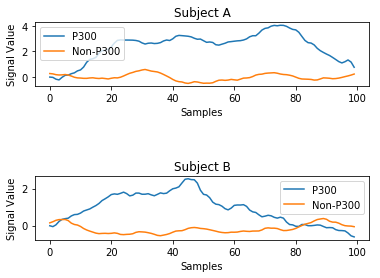

In [37]:
# A
A_Success, A_Fail = get_sessions_average(
    Subject_A_Signal_Train,
    Subject_A_StimulusCode_Train,
    Subject_A_TargetChar_Train[0],
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW,
    average_channels = False
)

ax1 = plt.subplot(3, 1, 1)
ax1.plot(A_Success[:, EXTRACTED_CHANNEL])
ax1.plot(A_Fail[:, EXTRACTED_CHANNEL])
ax1.set_title('Subject A')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Signal Value')
ax1.legend(('P300', 'Non-P300'))

# B
B_Success, B_Fail = get_sessions_average(
    Subject_B_Signal_Train,
    Subject_B_StimulusCode_Train,
    Subject_B_TargetChar_Train[0],
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW,
    average_channels = False
)

ax2 = plt.subplot(3, 1, 3)
ax2.plot(B_Success[:, EXTRACTED_CHANNEL])
ax2.plot(B_Fail[:, EXTRACTED_CHANNEL])
ax2.set_title('Subject B')
ax2.set_xlabel('Samples')
ax2.set_ylabel('Signal Value')
ax2.legend(('P300', 'Non-P300'))

In [38]:
# Function To Calculate PCA
def calculate_PCA(signals):
    
    signals_temp = numpy.zeros(signals.shape)

    pca = PCA(signals.shape[2])
    for epoch in range(signals.shape[0]):
        signals_temp[epoch] = normalize(signals[epoch])
        signals_temp[epoch] = pca.fit_transform(signals_temp[epoch])
    
    return signals_temp

In [39]:
# Function To Calculate Weights Within 1 Session Using FLD
def calculate_weights_FLD(
        signals,
        stimulus_code,
        target_char,
        matrix,
        extracted_channels,
        repeatitions = 15,
        start_window = 0,
        end_window = 240
    ):
    
    window = end_window - start_window
    intensifications = matrix.shape[0] + matrix.shape[1]
    
    responses = numpy.zeros((signals.shape[0], intensifications, window, signals.shape[2]))
    preprocessed_classes = numpy.zeros((signals.shape[0], intensifications))
    preprocessed_responses = numpy.zeros((signals.shape[0] * intensifications, window * extracted_channels.shape[0]))
    
    # Looping Through Characters (85 Character)
    for epoch in range(signals.shape[0]):

        responses[epoch] = get_runs_average(
            signals[epoch],
            stimulus_code[epoch],
            intensifications,
            repeatitions,
            start_window,
            end_window,
            average_channels = False
        )
        
        # Getting Index Of Chosen Character
        indices = numpy.where(matrix == target_char[epoch])
        chosen_column = indices[1][0]
        chosen_row = indices[0][0] + matrix.shape[1]


        for row_column in range(intensifications):
            if row_column == chosen_row or row_column == chosen_column:
                preprocessed_classes[epoch, row_column] = 1
            else:
                preprocessed_classes[epoch, row_column] = -1
    
    responses = numpy.reshape(responses, (signals.shape[0] * intensifications, window, signals.shape[2]))
    preprocessed_classes = numpy.reshape(preprocessed_classes, (signals.shape[0] * intensifications))
    
    for i in range(responses.shape[0]):
        for channel_index in range(extracted_channels.shape[0]):
            preprocessed_responses[i, (window * channel_index):(window * channel_index) + window] = responses[i, :, extracted_channels[channel_index]]
    
    return numpy.matmul(
            numpy.matmul(
                numpy.linalg.inv(numpy.matmul(
                    preprocessed_responses.T, # XT
                    preprocessed_responses # X
                )), # (XT * X) ^ -1
                preprocessed_responses.T # XT
            ), # ((XT * X) ^ -1) * XT
        preprocessed_classes) # (((XT * X) ^ -1) * XT) * Y

In [40]:
# Function To Predict Character
def predict_character(
        preprocessed_responses,
        weights,
        matrix
    ):
    
    intensifications = matrix.shape[0] + matrix.shape[1]
    
    predicted_classes = numpy.zeros((intensifications))
    for i in range(intensifications):
        predicted_classes[i] = numpy.matmul(numpy.transpose(weights), preprocessed_responses[i])
    
    column = numpy.where(predicted_classes == numpy.amax(predicted_classes[:6]))[0][0]
    row = numpy.where(predicted_classes == numpy.amax(predicted_classes[6:]))[0][0] - matrix.shape[1]
    
    return matrix[row][column]

In [41]:
# Function To Predict Characters
def predict_characters(
        signals,
        stimulus_code,
        extracted_channels,
        weights,
        matrix,
        repeatitions = 15,
        start_window = 0,
        end_window = 240
    ):
    
    predicted_string = ''
    window = end_window - start_window
    intensifications = matrix.shape[0] + matrix.shape[1]
    
    for epoch in range(signals.shape[0]):
        responses = get_runs_average(
            signals[epoch],
            stimulus_code[epoch],
            intensifications,
            repeatitions,
            start_window,
            end_window,
            average_channels = False
        )
        
        preprocessed_responses = numpy.zeros((intensifications, window * extracted_channels.shape[0]))
        for i in range(responses.shape[0]):
            for channel_index in range(extracted_channels.shape[0]):
                preprocessed_responses[i, (window * channel_index):(window * channel_index) + window] = responses[i, :, extracted_channels[channel_index]]
        
        predicted_string += predict_character(preprocessed_responses, weights, matrix)
    
    return predicted_string

In [42]:
# Function To Calculate Accuracy
def calculate_accuracy(
        target_characters,
        predicted_characters
    ):
    
    accuracy = 0
    for i in range(len(target_characters)):
        if target_characters[i] == predicted_characters[i]:
            accuracy += 1
    accuracy = (accuracy / len(target_characters)) * 100
    
    return accuracy

In [43]:
Subject_A_Weights = calculate_weights_FLD(
    Subject_A_Signal_Train,
    Subject_A_StimulusCode_Train,
    Subject_A_TargetChar_Train[0],
    MATRIX,
    EXTRACTED_CHANNELS,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_A_Train_Prediction = predict_characters(
    Subject_A_Signal_Train,
    Subject_A_StimulusCode_Train,
    EXTRACTED_CHANNELS,
    Subject_A_Weights,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_A_Test_Prediction = predict_characters(
    Subject_A_Signal_Test,
    Subject_A_StimulusCode_Test,
    EXTRACTED_CHANNELS,
    Subject_A_Weights,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_A_Signal_Train_PCA = calculate_PCA(Subject_A_Signal_Train)
Subject_A_Signal_Test_PCA = calculate_PCA(Subject_A_Signal_Test)

Subject_A_Weights_PCA = calculate_weights_FLD(
    Subject_A_Signal_Train_PCA,
    Subject_A_StimulusCode_Train,
    Subject_A_TargetChar_Train[0],
    MATRIX,
    EXTRACTED_CHANNELS,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_A_Train_Prediction_PCA = predict_characters(
    Subject_A_Signal_Train_PCA,
    Subject_A_StimulusCode_Train,
    EXTRACTED_CHANNELS,
    Subject_A_Weights_PCA,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_A_Test_Prediction_PCA = predict_characters(
    Subject_A_Signal_Test_PCA,
    Subject_A_StimulusCode_Test,
    EXTRACTED_CHANNELS,
    Subject_A_Weights,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

print('A Train Prediction:', calculate_accuracy(Subject_A_TargetChar_Train[0], Subject_A_Train_Prediction))
print('A Test Prediction:', calculate_accuracy(SUBJECT_A_TEST_RESULTS, Subject_A_Test_Prediction))
print('A Train Prediction PCA:', calculate_accuracy(Subject_A_TargetChar_Train[0], Subject_A_Train_Prediction_PCA))
print('A Test Prediction PCA:', calculate_accuracy(SUBJECT_A_TEST_RESULTS, Subject_A_Test_Prediction_PCA))

A Train Prediction: 100.0
A Test Prediction: 14.000000000000002
A Train Prediction PCA: 95.29411764705881
A Test Prediction PCA: 4.0


In [44]:
Subject_B_Weights = calculate_weights_FLD(
    Subject_B_Signal_Train,
    Subject_B_StimulusCode_Train,
    Subject_B_TargetChar_Train[0],
    MATRIX,
    EXTRACTED_CHANNELS,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_B_Train_Prediction = predict_characters(
    Subject_B_Signal_Train,
    Subject_B_StimulusCode_Train,
    EXTRACTED_CHANNELS,
    Subject_B_Weights,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_B_Test_Prediction = predict_characters(
    Subject_B_Signal_Test,
    Subject_B_StimulusCode_Test,
    EXTRACTED_CHANNELS,
    Subject_B_Weights,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_B_Signal_Train_PCA = calculate_PCA(Subject_B_Signal_Train)
Subject_B_Signal_Test_PCA = calculate_PCA(Subject_B_Signal_Test)

Subject_B_Weights_PCA = calculate_weights_FLD(
    Subject_B_Signal_Train_PCA,
    Subject_B_StimulusCode_Train,
    Subject_B_TargetChar_Train[0],
    MATRIX,
    EXTRACTED_CHANNELS,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_B_Train_Prediction_PCA = predict_characters(
    Subject_B_Signal_Train_PCA,
    Subject_B_StimulusCode_Train,
    EXTRACTED_CHANNELS,
    Subject_B_Weights_PCA,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

Subject_B_Test_Prediction_PCA = predict_characters(
    Subject_B_Signal_Test_PCA,
    Subject_B_StimulusCode_Test,
    EXTRACTED_CHANNELS,
    Subject_B_Weights,
    MATRIX,
    start_window=START_WINDOW,
    end_window=END_WINDOW
)

print('B Train Prediction:', calculate_accuracy(Subject_B_TargetChar_Train[0], Subject_B_Train_Prediction))
print('B Test Prediction:', calculate_accuracy(SUBJECT_B_TEST_RESULTS, Subject_B_Test_Prediction))
print('B Train Prediction PCA:', calculate_accuracy(Subject_B_TargetChar_Train[0], Subject_B_Train_Prediction_PCA))
print('B Test Prediction PCA:', calculate_accuracy(SUBJECT_B_TEST_RESULTS, Subject_B_Test_Prediction_PCA))

B Train Prediction: 100.0
B Test Prediction: 4.0
B Train Prediction PCA: 92.94117647058823
B Test Prediction PCA: 2.0
